In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df=pd.read_csv("E:/mousita/ML/datasets/BostonHousing.csv")

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#check for multicorlinearity
c=df.corr()

In [5]:
c

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

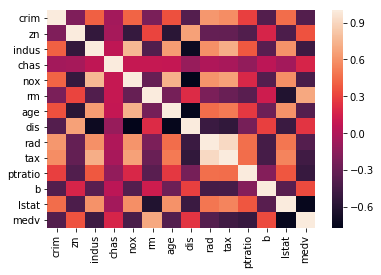

In [7]:
sns.heatmap(c)
plt.show()

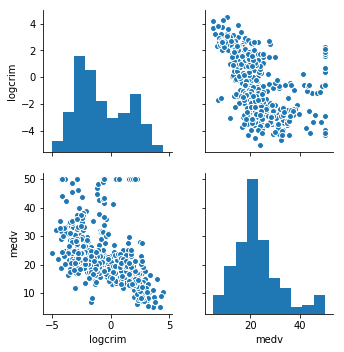

In [14]:
#to find the linear independent values
sns.pairplot(df.iloc[:,[-1,-2]])
plt.show()

In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,medv
tax,,,,,,,,,,,,,
296,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
242,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
242,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
222,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
222,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


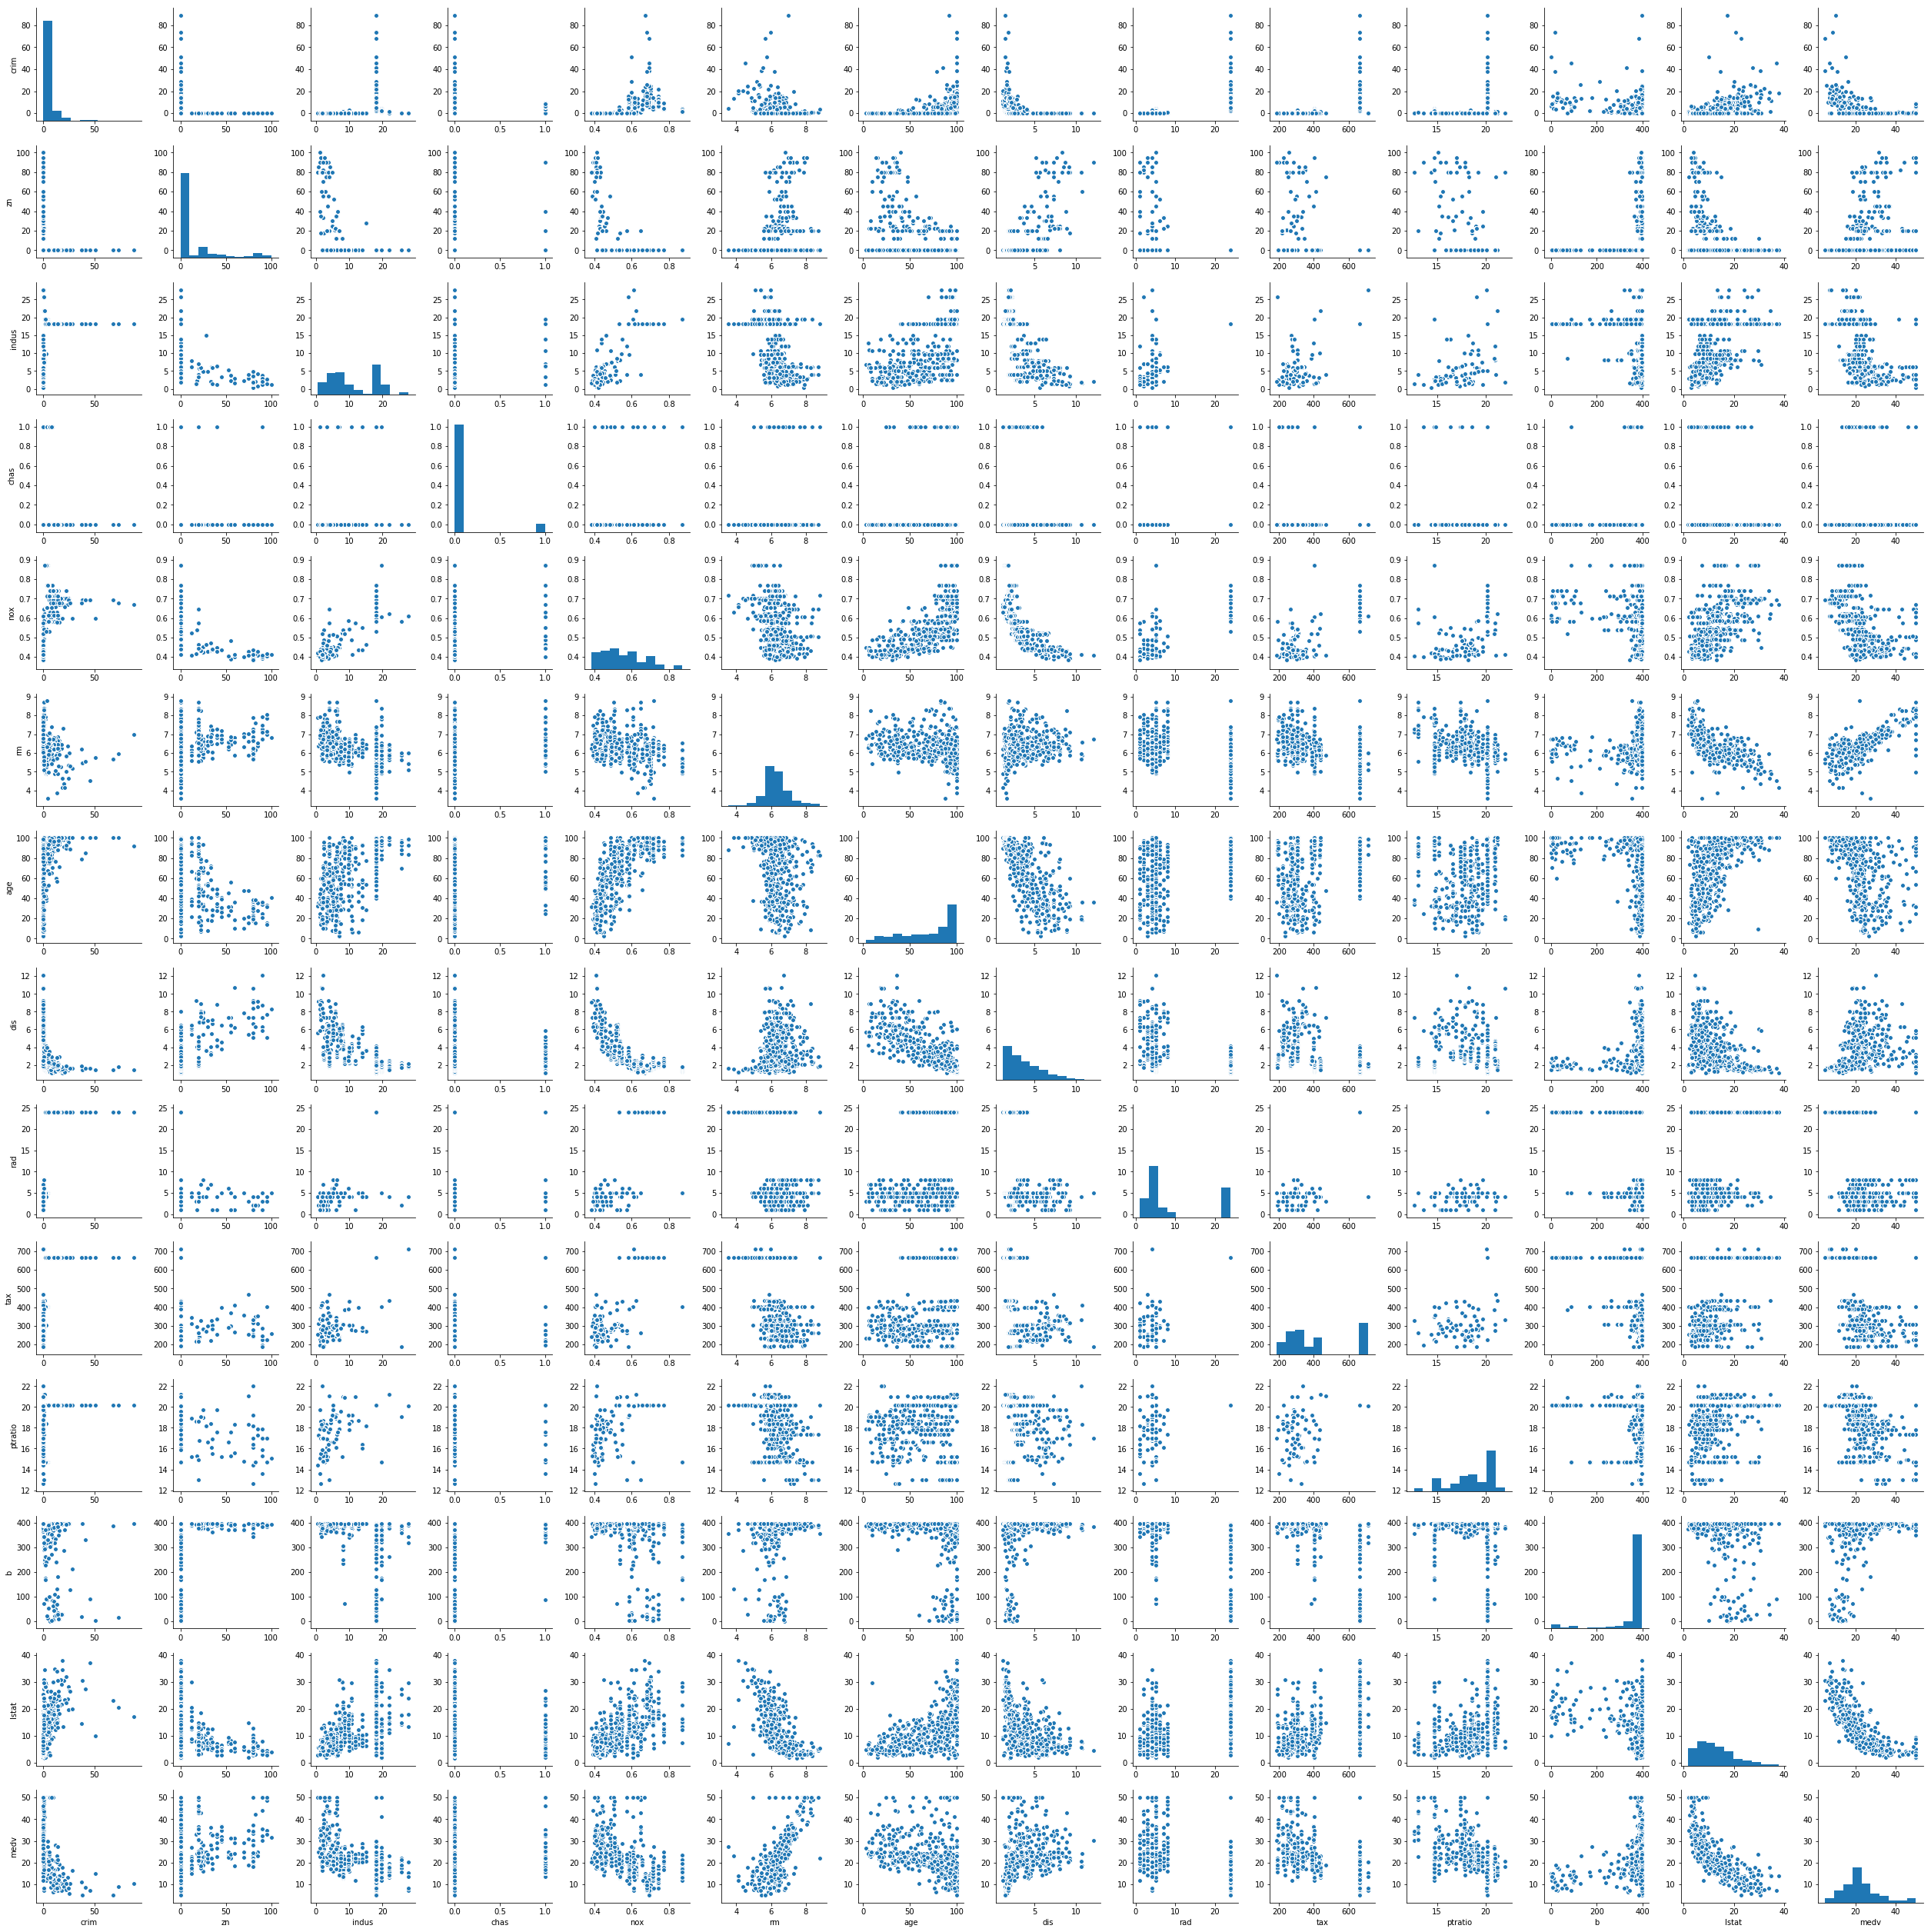

In [9]:
sns.pairplot(df)
plt.show()

In [13]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'logcrim'],
      dtype='object')

In [12]:
#doing a log transformation to normalise CRIM

df['logcrim']=df['crim'].map(np.log)

In [26]:
df['logcrim']

0     -5.064036
1     -3.600502
2     -3.601235
3     -3.430523
4     -2.672924
5     -3.511570
6     -2.427128
7     -1.934130
8     -1.554760
9     -1.771722
10    -1.492144
11    -2.141572
12    -2.366804
13    -0.462416
14    -0.449480
15    -0.466187
16     0.052526
17    -0.243091
18    -0.219762
19    -0.320481
20     0.224575
21    -0.160122
22     0.209020
23    -0.011637
24    -0.287335
25    -0.173711
26    -0.397631
27    -0.045238
28    -0.257489
29     0.002447
         ...   
476    1.583383
477    2.709609
478    2.325618
479    2.662613
480    1.761989
481    1.741900
482    1.745918
483    1.036162
484    0.866499
485    1.301191
486    1.739018
487    1.576020
488   -1.891403
489   -1.696249
490   -1.572817
491   -2.246772
492   -2.195346
493   -1.752673
494   -1.274503
495   -1.720425
496   -1.239255
497   -1.315351
498   -1.430790
499   -1.726927
500   -1.494414
501   -2.770511
502   -3.095111
503   -2.800824
504   -2.211009
505   -3.048922
Name: logcrim, Length: 5

In [32]:
x = df.iloc[:,[1,2,3,4,5,6,7,8,10,11,12,14]]
y = df.iloc[:,-2]

In [20]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'logcrim'],
      dtype='object')

In [50]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,logmedv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,3.589059


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=9)

In [42]:
reg = LinearRegression()

In [43]:
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:

reg.coef_

array([ 3.48429122e-02, -5.20971932e-02,  2.73910424e+00, -1.90550265e+01,
        3.86679797e+00, -7.99494744e-03, -1.35682077e+00, -1.45816873e-02,
       -9.52126353e-01,  9.18031714e-03, -5.52440657e-01,  5.42426137e-01])

In [45]:
y_pred=reg.predict(x_test)

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_pred,y_test)

0.7067564858776887

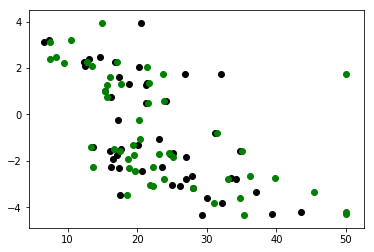

In [48]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,x_test.iloc[:,-1],color='black')
plt.scatter(y_test,x_test.iloc[:,-1],color='green')

plt.show()

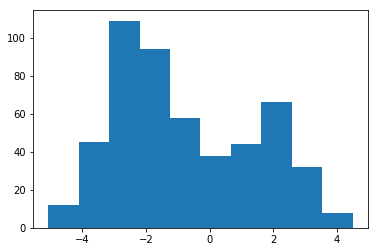

In [28]:
#check for normal distribution
plt.hist(df['logcrim'])
plt.show()

In [39]:
#to find the random state value
import numpy as np
ts_score=[]
for j in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x,y , random_state =j,test_size=0.1)
    lr = LinearRegression().fit(X_train, y_train)

    #tr_score.append(lr.score(X_train, y_train))
    ts_score.append(lr.score(X_test, y_test))

J = ts_score.index(np.max(ts_score))


In [40]:
J

9